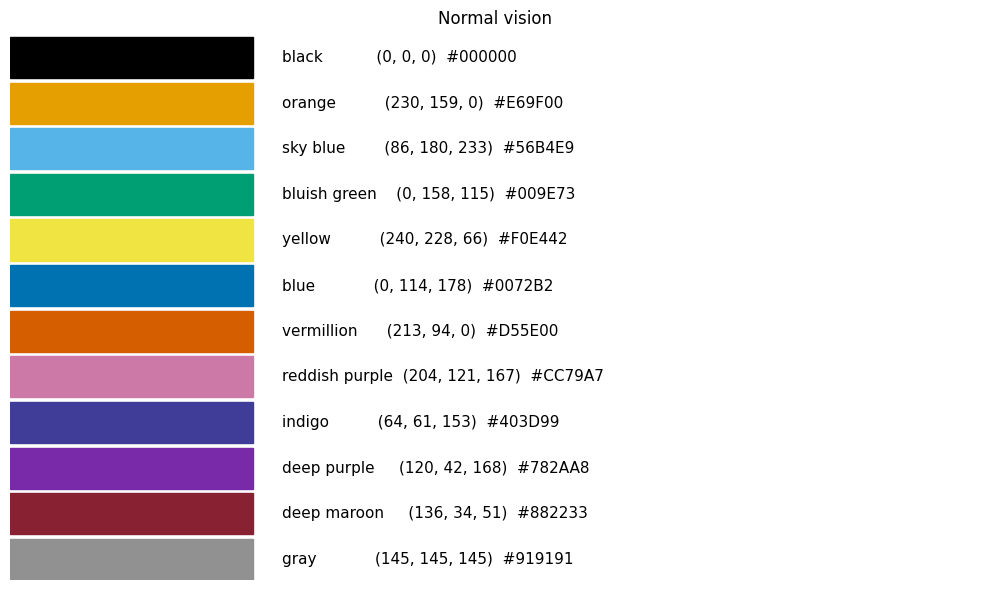

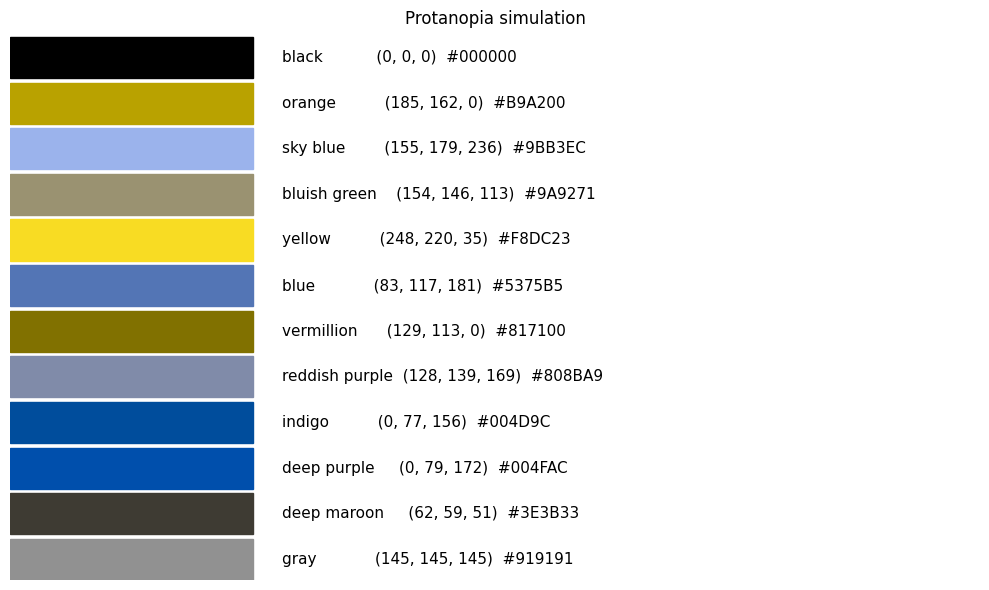

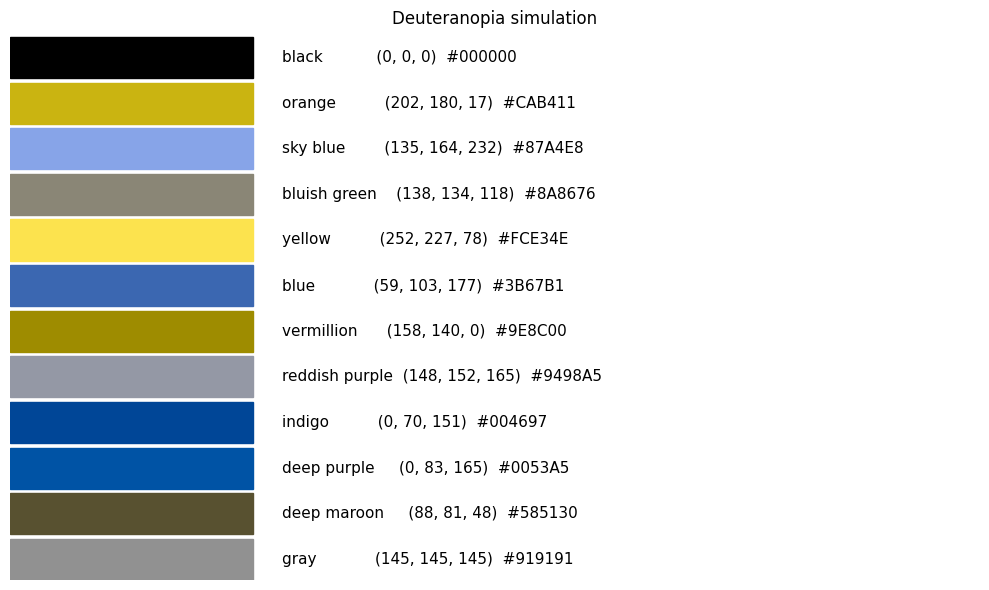

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Updated palette: Okabe–Ito 8 + (indigo, deep purple) + (deep maroon) + (gray)
palette = [
    ("black", (0, 0, 0)),
    ("orange", (230, 159, 0)),
    ("sky blue", (86, 180, 233)),
    ("bluish green", (0, 158, 115)),
    ("yellow", (212, 199, 47)),
    ("blue", (0, 114, 178)),
    ("vermillion", (213, 94, 0)),
    ("reddish purple", (204, 121, 167)),

    # additions
    ("indigo", (64, 61, 153)),        # #403D99
    ("deep purple", (120, 42, 168)),  # #782AA8
    ("deep maroon", (136, 34, 51)),   # #882233
    ("gray", (145, 145, 145)),        # #919191
]

# Machado et al. (approx) matrices for full dichromacy in linear RGB
PROTAN = np.array([
    [0.152286, 1.052583, -0.204868],
    [0.114503, 0.786281,  0.099216],
    [-0.003882,-0.048116, 1.051998]
])
DEUTAN = np.array([
    [0.367322, 0.860646, -0.227968],
    [0.280085, 0.672501,  0.047413],
    [-0.011820, 0.042940, 0.968881]
])

def srgb_to_linear(c):
    c = np.asarray(c)
    return np.where(c <= 0.04045, c / 12.92, ((c + 0.055) / 1.055) ** 2.4)

def linear_to_srgb(c):
    c = np.asarray(c)
    return np.where(c <= 0.0031308, 12.92 * c, 1.055 * (c ** (1 / 2.4)) - 0.055)

def simulate(rgb255, mat):
    c = np.array(rgb255) / 255.0
    lin = srgb_to_linear(c)
    lin2 = lin @ mat.T
    srgb = linear_to_srgb(np.clip(lin2, 0, 1))
    return tuple((srgb * 255).round().astype(int))

def draw(title, colors):
    n = len(colors)
    fig, ax = plt.subplots(figsize=(10, 0.5 * n))
    ax.set_title(title)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, n)
    ax.axis("off")
    for i, (name, rgb) in enumerate(colors):
        ax.add_patch(
            plt.Rectangle((0, n - 1 - i), 2.5, 0.9, color=np.array(rgb) / 255)
        )
        ax.text(
            2.8, n - 0.55 - i,
            f"{name:14s}  {rgb}  #{rgb[0]:02X}{rgb[1]:02X}{rgb[2]:02X}",
            va="center", fontsize=11
        )
    plt.tight_layout()

normal = palette
protan = [(name, simulate(rgb, PROTAN)) for name, rgb in palette]
deutan = [(name, simulate(rgb, DEUTAN)) for name, rgb in palette]

draw("Normal vision", normal)
draw("Protanopia simulation", protan)
draw("Deuteranopia simulation", deutan)
plt.show()